# What i want to build

## A system to trac and display the top 10 best-selling items on an e-commerce website

Plan - What are our requirements? WOrking backwards:
*   There are millions of end-users, generating thousands of queries per second
  *   It must be fast - page latency is important.
  *   So we need some NoSQL solutions
  *   Access pattern is simple: "Give me the current top N sellers in category X"
*   Hourly updates probably good enough(consistency not hugely important).
*   Must be highly available(customers don't like broken websites).
*   So we want partition-tolerance and availability more than consistency.

###Solution
*   Cassandra database values availability and partition over consistency.
*   But how does data get into Cassandra:
  *   Spark talks to Cassandra
  *   Spark Streaming can add things up over windows
  *   Storm or Flink can also be used.
*   How does data get into Spark Streaming?
  *   Kafka or flume - either works just fine
  *   Flume is purpose built for HDFS and log ingestion(it has log4j interceptor.
*   Security is also to be considered in this solution.
  *   Purchase data is sensitive - a security review is suggested.
    *   Blasting around raw logs that include P11* is a bad idea.
    *   Strip out data you do not need at the source.
  *   Security consideration can force you inot another design
    *   Instead of ingestinng logs as they are generated, some intermediate database, or publisher mey be involved where P11 is scrubbed.  




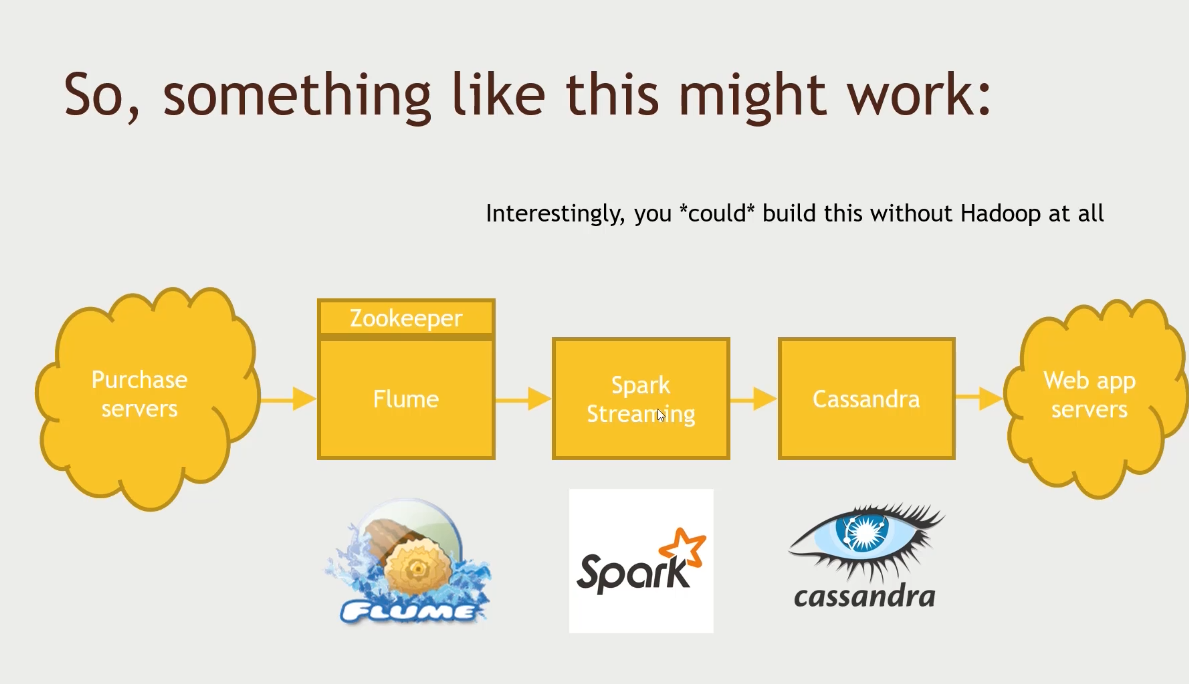

# Movie Recomendation

## WOrking Backwards
*   Users want to discover movies they have not seen yet that they might enjoy.
*   There own behavior(rating, purchases, views) might be the best predictors.
*   As before, availability and partition -tolerance are important.  Consistency , not so much.

## Solution:
*   A NoSQL solution such as Cassadra
*   If I am using Cassandra, how do i get movies recommendations into it?
  *   We need to do Machine learning and Spark MLLib is an option
  *   Flink can also be an alternative.
*   Timelines requirement needs to be though out.
  *   Real-timme-ML is a tall order - do we really need recommendations based o the rating you just left?
  *   Than kinda would be nice but way too costly to do for every user.

### rethinking solution:
*   Pre-computing recommendation for every user;
  *   Is not timely 
  *   Waste fo resorce
*   Item-based collaborative filtering
  *   Store moies similar to other movies(these ralationship don't change quickly)
  *   At runtime, recommend movies similar to the ones you have liked(based upon real time behavior data).
*   So we need soemthing that can quickly look up movies similar to the ones you have liked at scale
  *   Could reside within web app, but probably want your own service for this.
*   We also need to get your past rating, reviews, etc
*   We would have some web service to create recomendations on demand
*   It'll talkt to a fast NoSQL data staore with movie similartity data 
*   It also needs to pass rating, purchases, etc
*   Movies similarities(which are expensive) can be updated infrequentlybased on log data with views,ratings, etc.




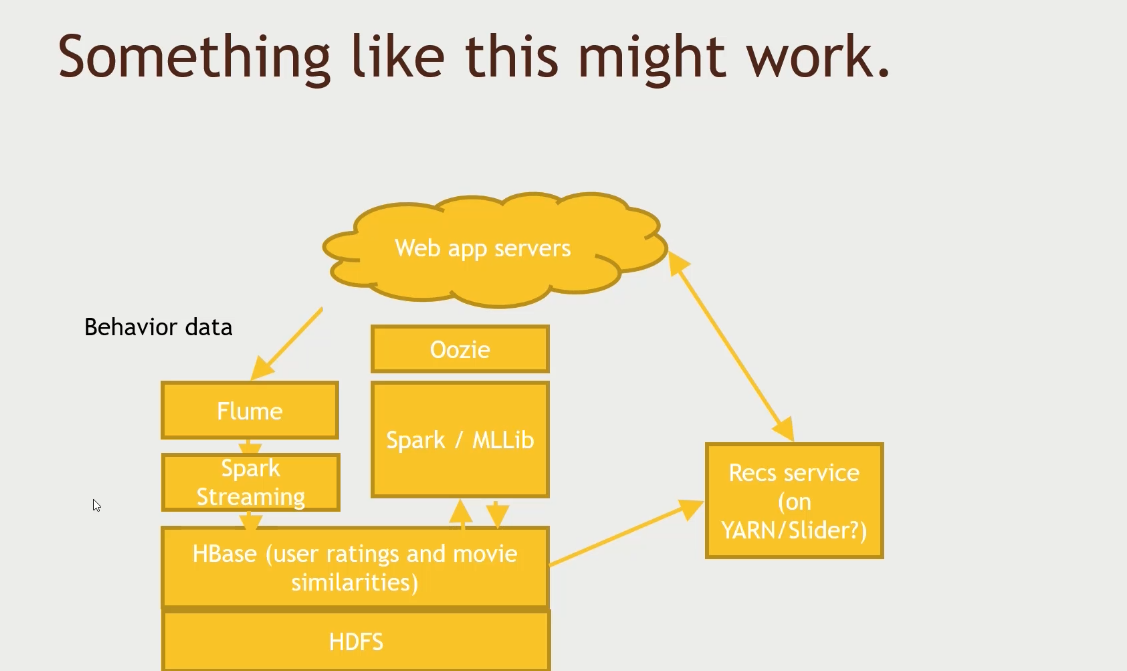

# Design a to report web session per day

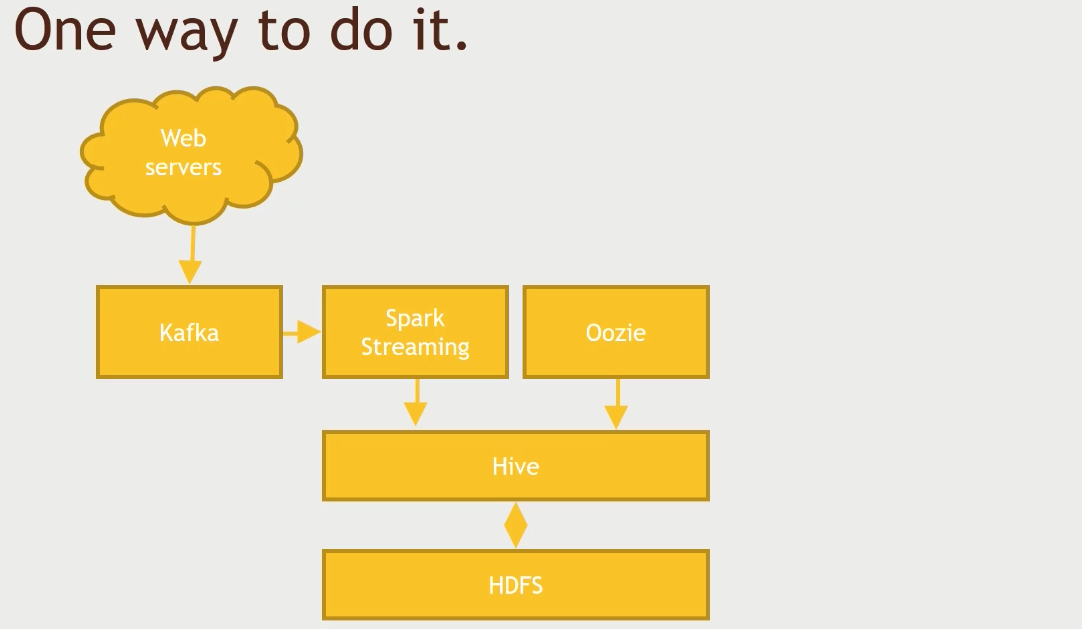